# **Support Vector Machine for Tumor Detection**

---


**Objective:** In this exercise, we will train a Machine Learning Model using Support Vector Machine algorithm from the scikit library, to implement a classification model on a breast cancer dataset.

We will be classifying if a tumor is (2) Benign or (4) Malignant from these inputs:

*   Clump Thickness (1-10)
*   Uniformity of Cell Size (1-10)
*   Uniformity of Cell Shape (1-10)







# Importing Needed Libraries:

* numpy: for scientific computing
* matplotlib: for plotting and visualization
* pandas: for data reading and manipulation




In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the Dataset



The Data is currently stored in a CSV file named **breast-cancer-wisconsin.csv**

In [4]:
 #Read the Data file
data = pd.read_csv('breast-cancer-wisconsin.csv')
 #Prints the first 5 rows of the data
data.head()

,ID,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Benign (2) or Malignant (4)
0,1000025,5,1,1,2
1,1002945,5,4,4,2
2,1015425,3,1,1,2
3,1016277,6,8,8,2
4,1017023,4,1,1,2


# Number of Rows and Columns:
Let's dig and see the number of rows and columns in our data:

In [5]:
n_rows = data.shape[0]
n_columns = data.shape[1]
print('There are ' + str(n_rows) + ' rows and ' + str(n_columns) + ' columns.')

There are 684 rows and 5 columns.


# Data Preprocessing:

Data preprocessing involves dividing the data into features/attributes and labels, and then we will move to divide them into training and testing sets.

In [6]:
#all the columns except the ID and Class columns are being stored as input
x = data.drop(['Benign (2) or Malignant (4)', 'ID'], axis = 1) 
y = data['Benign (2) or Malignant (4)']


Now we will split our data between training and testing by using the scikit learn library.

In [7]:
#Scikit-Learn Library contains the train_test_split method that allows the division of data into train and test sets
from sklearn.model_selection import train_test_split

#20% of the data is assigned for testing, and the rest for training
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)



# Training the Algorithm: Linear SVM
To train the SVM on the training data, we will use scikit-learn's svm library. This class takes the kernel type as parameter, and as a start we will use a 'linear' kernel for simplicity to see if we can seperate the data linearly, keeping non-linear kernels for the next section.

SVC stands for Support Vector Classifier.

In [8]:
from sklearn.svm import SVC

svclassifier = SVC(kernel = 'linear')
svclassifier.fit(X_train, y_train) #"fit" is called to train the algorithm on the training data

SVC(kernel='linear')

# Predictions:
In order to make predictions, we will use "predict" from the svc class:

In [10]:


y_pred=svclassifier.predict(X_test) #Predict the class of the test set


# Evaluating our Algorithm
We will be using an accuracy based metric to evaluate our algorithm:

In [11]:
from sklearn.metrics import accuracy_score
print ("Our model predicts the test set with " + str( 100*accuracy_score(y_test,y_pred) ) +"% accuracy")

Our model predicts the test set with 93.43065693430657% accuracy


# Plotting the SVM:
We will be using the matplotlib.pyplot library to plot the results of our predictions on the test set with the decision boundary:

The form of the decision boundary in an SVM Classification would be of the form a0 + a1 x + a2 y +a3 z = 0

Given that the 3 features x, y, and z are respectively the "Clump Thickness" "Uniformity of Cell Size" and the "Uniformity of Cell Shape".

To draw this equation, we will change its form to be: z = a x + by + c
<br>Where:

*   a = -a1/a3
*   b = -a2/a3
*   c = -a0/a3



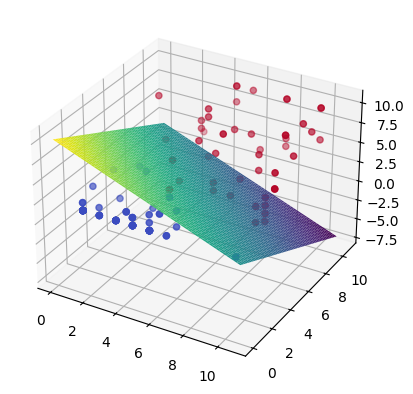

In [12]:
#Capture the coefficients of the features x, and y (which are a1, and a2)
coefficients = svclassifier.coef_[0]

#Get the intercept (which is a0)
intercept = svclassifier.intercept_[0]




a0 = intercept
a1 = coefficients[0] # The 1st feature : Clump Thickness
a2 = coefficients[1] # The 2nd feature : Uniformity of Cell Size
a3 = coefficients[2] # The 3rd feature : Uniformity of Cell Shape

a = -a1/a3
b = -a2/a3
c = -a0/a3

fig = plt.figure()
ax = plt.axes(projection='3d') #note: we're plotting in a 3D space

#Plot the dataPoints
data_x = np.array(X_test)[:,0] # Clump Thickness
data_y = np.array(X_test)[:,1] # Uniformity of Cell Size
data_z = np.array(X_test)[:,2] # Uniformity of Cell Shape
ax.scatter3D(data_x, data_y, data_z, c=y_pred, cmap=plt.cm.coolwarm)

#Now we will plot z = ax + by + c (the separator / decision boundary - aka the model - learned by the SVC algorithm)
x_min, x_max = data_x.min() - 1, data_x.max() + 1
y_min, y_max = data_y.min() - 1, data_y.max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, .2), np.arange(y_min, y_max, .2))
zz = a*xx + b*yy + c

ax.plot_surface(xx, yy, zz, rstride=1, cstride=1, cmap='viridis', edgecolor='none' )

As seen above, the data is clearly linearly seperable.